## SHARK'S PROYECT JPdA

### Introducción

En este proyecto vamos a analizar los ataques de tiburones en el mundo para tratar de demostrar 3 hipótesis:

    Hipótesis 1: Nadar es la actividad más peligrosa por encima del surf.
    Hipótesis 2: El tiburón blanco es el más mortal.
    Hipótesis 3: Hay más ataques en USA que entre Australia y Sudáfrica.

Primero importamos las librerias que vamos a utilizar en este documento:

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt

Además, necesitamos importar el DataFrame ya filtrado en el documento anterior:

In [2]:
shark_final = pd.read_csv("data/df_fin.csv",encoding = "ISO-8859-1")

In [3]:
shark_final.head()

,Unnamed: 0,area,location,original_order,activity_new,species_filt,fatal_new,country_org
0,0,California,"Oceanside, San Diego County",6303.0,Surfing,White shark,N,USA
1,1,Georgia,"St. Simon Island, Glynn County",6302.0,Otra,Desconocido,N,USA
2,2,Hawaii,"Habush, Oahu",6301.0,Surfing,Desconocido,N,USA
3,3,New South Wales,Arrawarra Headland,6300.0,Surfing,Desconocido,N,AUSTRALIA
4,4,Colima,La Ticla,6299.0,Diving,Tiger shark,N,NaN


In [4]:
shark_final.shape

(6309, 8)

Por último, configuramos las opciones de visualización para matplotlib y seaborn: 

In [5]:
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'

In [6]:
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

### Hipótesis 1

#### Para demostrar la hipótesis 1, utilizaré un histograma que relacione la variable actividades con la variable fatal.

<AxesSubplot:xlabel='activity_new', ylabel='Count'>

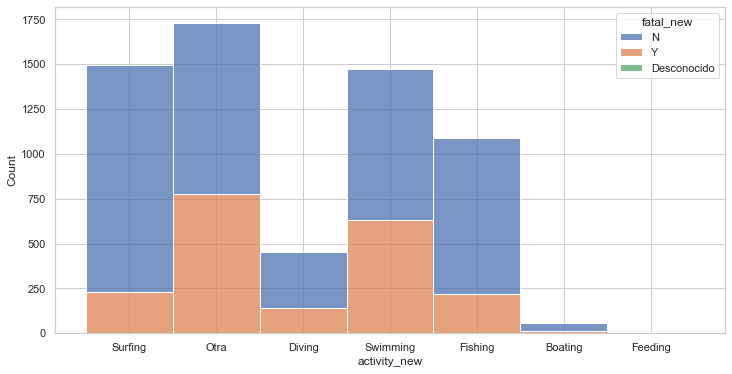

In [7]:
sns.histplot(data=shark_final, x='activity_new', hue='fatal_new', multiple='stack')

Como se puede observar en la gráfica, muere más gente mientras practica la natación que gente mientras surfea. Esto demuestra la hipótesis 1.


### Hipótesis 2

Para poder llegar a una conclusión sobre esta hipótesis, voy a realizar una gráfica de barras, en la que se indica cuantos ataques mortales y no mortales se han llevado a cabo por cada especie de tiburon.

<AxesSubplot:xlabel='species_filt', ylabel='count'>

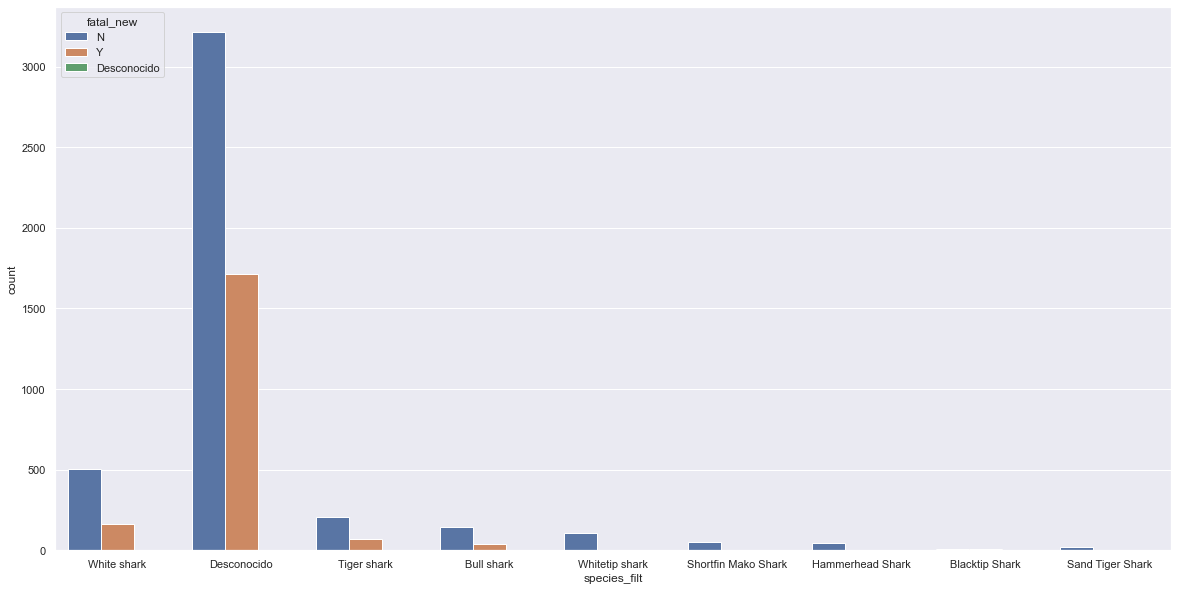

In [8]:
sns.set(rc={'figure.figsize':(20,10)})
sns.countplot(data = shark_final, x="species_filt", hue="fatal_new")

Con esta gráfica podemos afirmar que los principales ataques mortales se llevan a cabo por los tiburones tigre, toro y blanco.

In [9]:
shark_final.groupby(["species_filt", "fatal_new"])["original_order"].count()

species_filt         fatal_new  
Blacktip Shark       N                 8
                     Y                10
Bull shark           N               145
                     Y                41
Desconocido          Desconocido       2
                     N              3212
                     Y              1714
Hammerhead Shark     N                46
                     Y                 3
Sand Tiger Shark     N                18
Shortfin Mako Shark  N                54
                     Y                 2
Tiger shark          N               207
                     Y                71
White shark          N               504
                     Y               164
Whitetip shark       N               107
                     Y                 1
Name: original_order, dtype: int64

A partir de esta tabla, podemos sacar los ratios de muertes por ataque para cada especie:
White shark: 24.6%
Bull shark: 22%
Tiger shark: 25.5%
Por lo tanto, queda demostrado que la segunda hipótesis es falsa.

### Hipótesis 3

Para demostrar la tercera hipótesis, simplemente debemos hacer un recuento de los ataques que se han producido tanto en USA con en Australia y Sudáfrica.

In [10]:
country_rec = shark_final["country_org"].value_counts()

In [11]:
display(country_rec)

USA             2229
AUSTRALIA       1338
SOUTH AFRICA     579
Name: country_org, dtype: int64

Como se puede observar, USA suma un total de 2229 ataques mientras que entre Australia y Sudáfrica suman 1917. Por lo tanto, queda demostrada también la tercera hipótesis.

### Conclusión

En resumen:
    La hipótesis 1 y 3 eran ciertas y han quedado demostradas en este documento.
    La hipótesis 2, sin embargo, es falsa.